# Librerías

In [1]:
## Manipulación de datos, gráficos y demás
import random # Para setear semilla
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

## Para CNN
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Image augmentation (Sección 10.3.4 de James)
from tensorflow.keras.models import load_model # Para cargar un modelo guardado
import sklearn.metrics as metrics # Métricas predictivas

# Importación del test

In [2]:
# Seteo cuál es el path a las carpetas que contienen a las imágenes de entrenamiento, validación y testeo
test_path = '.\\img\\test'

In [3]:
image_gen = ImageDataGenerator(rescale= 1/255)          # Rescalar la imagen para normalizarla entre 0 y 1

In [4]:
random.seed(7777777)
test_image = image_gen.flow_from_directory(
    test_path,                # Le asigno el path del training set
    target_size = (100, 100), # Especifico los parámetros de largo y ancho
    color_mode = 'rgb',       # La escala de color
    batch_size = 16,          # Tamaño de subgrupos de imágenes (1717 / 16 = 108 "pasos" de cada epoch)
    shuffle = False,          # No mezclar las imágenes de testeo
    class_mode = 'binary')    # Especifico el tipo de clasificación

Found 215 images belonging to 2 classes.


# Carga de modelos

In [6]:
# Importo los modelos
# model_3 = load_model('100x100_3capas.keras')
model_2 = load_model('100x100_2capas.keras')

TypeError: <class 'keras.src.models.sequential.Sequential'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras', 'class_name': 'Sequential', 'config': {'name': 'sequential_1', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 100, 100, 3], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'conv2d_3_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_3', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 100, 100, 3], 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 100, 100, 3]}}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_3', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 98, 98, 32]}}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_4', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 100, 100, 3], 'filters': 64, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 49, 49, 32]}}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_4', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 47, 47, 64]}}, {'module': 'keras.layers', 'class_name': 'Flatten', 'config': {'name': 'flatten_1', 'trainable': True, 'dtype': 'float32', 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 23, 23, 64]}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_2', 'trainable': True, 'dtype': 'float32', 'units': 128, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 33856]}}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'activation_1', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'registered_name': None, 'build_config': {'input_shape': [None, 128]}}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout_1', 'trainable': True, 'dtype': 'float32', 'rate': 0.5, 'noise_shape': None, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 128]}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_3', 'trainable': True, 'dtype': 'float32', 'units': 1, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 128]}}]}, 'registered_name': None, 'build_config': {'input_shape': [None, 100, 100, 3]}, 'compile_config': {'optimizer': 'adam', 'loss': 'binary_crossentropy', 'metrics': ['accuracy'], 'loss_weights': None, 'weighted_metrics': None, 'run_eagerly': None, 'steps_per_execution': None, 'jit_compile': None}}.

Exception encountered: <class 'keras.src.layers.convolutional.conv2d.Conv2D'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_3', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 100, 100, 3], 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 100, 100, 3]}}.

Exception encountered: Error when deserializing class 'Conv2D' using config={'name': 'conv2d_3', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 100, 100, 3], 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}.

Exception encountered: Unrecognized keyword arguments passed to Conv2D: {'batch_input_shape': [None, 100, 100, 3]}

# Evaluación de los modelos

## Modelo 100x100 con 2 capas

In [7]:
model_2.evaluate(test_image)

NameError: name 'model_2' is not defined

In [23]:
pred_probabilities = model_2.predict(test_image)

14/14 [==============================] - 2s 158ms/step


In [24]:
predicted_classes = np.round(pred_probabilities)

In [25]:
true_classes = test_image.classes
class_labels = (['Siirt', 'Kirmizi'])

In [10]:
print(metrics.classification_report(true_classes, predicted_classes, target_names=class_labels))

              precision    recall  f1-score   support

       Siirt       0.90      0.97      0.93       114
     Kirmizi       0.97      0.87      0.92       101

    accuracy                           0.93       215
   macro avg       0.93      0.92      0.92       215
weighted avg       0.93      0.93      0.93       215



<Axes: >

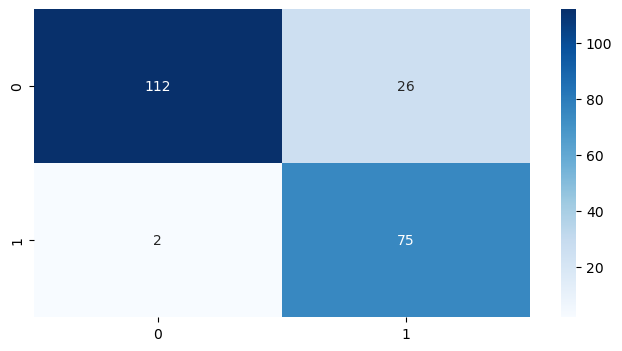

In [26]:
plt.figure(figsize=(8,4))
sns.heatmap(metrics.confusion_matrix(predicted_classes, true_classes), annot=True, cmap='Blues', fmt='g')

## Modelo 100x100 con 3 capas

In [27]:
model_3.evaluate(test_image)

14/14 [==============================] - 2s 142ms/step - loss: 0.2217 - accuracy: 0.9256


[0.22170989215373993, 0.9255813956260681]

In [28]:
pred_probabilities = model_3.predict(test_image)

14/14 [==============================] - 2s 141ms/step


In [29]:
predicted_classes = np.round(pred_probabilities)

In [30]:
true_classes = test_image.classes
class_labels = (['Siirt', 'Kirmizi'])

In [16]:
print(metrics.classification_report(true_classes, predicted_classes, target_names=class_labels))

              precision    recall  f1-score   support

       Siirt       0.81      0.98      0.89       114
     Kirmizi       0.97      0.74      0.84       101

    accuracy                           0.87       215
   macro avg       0.89      0.86      0.87       215
weighted avg       0.89      0.87      0.87       215



<Axes: >

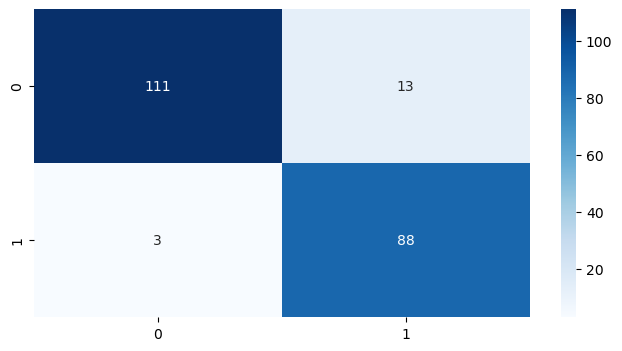

In [32]:
plt.figure(figsize=(8,4))
sns.heatmap(metrics.confusion_matrix(predicted_classes, true_classes), annot=True, cmap='Blues', fmt='g')